# Monte Carlo Simulation 

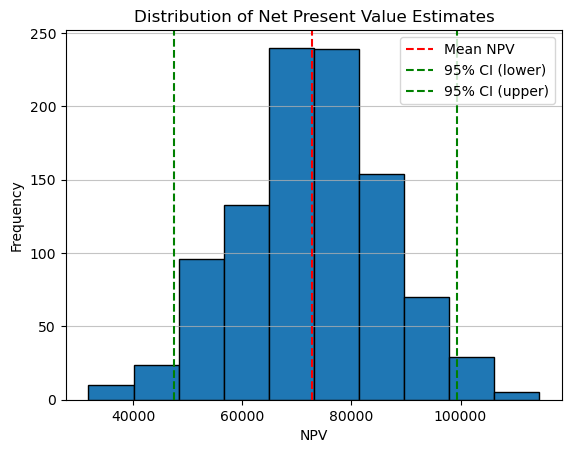

Average NPV: 72806.29404071996
95% Confidence Interval: [47462.10502303 99345.30099411]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_npv(initial_investment, cash_flows, discount_rate):
    npv = -initial_investment
    for i, cash_flow in enumerate(cash_flows):
        npv += cash_flow / (1 + discount_rate) ** (i + 1)
    return npv

initial_investment = 100000
annual_cash_flows = [30000, 35000, 40000, 45000, 50000]
discount_rate = 0.05
num_iterations = 1000 #Number of scenarios

mean_cash_flows = np.mean(annual_cash_flows)
std_cash_flows = np.std(annual_cash_flows)

npvs = []
for i in range(num_iterations):
    simulated_cash_flows = np.random.normal(mean_cash_flows, std_cash_flows, 5)
    npv = calculate_npv(initial_investment, simulated_cash_flows, discount_rate)
    npvs.append(npv)

average_npv = np.mean(npvs)
ci_95 = np.percentile(npvs, [2.5, 97.5])

plt.hist(npvs, edgecolor='black')
plt.axvline(x=average_npv, color='red', linestyle='--', label='Mean NPV')
plt.axvline(x=ci_95[0], color='green', linestyle='--', label='95% CI (lower)')
plt.axvline(x=ci_95[1], color='green', linestyle='--', label='95% CI (upper)')
plt.xlabel('NPV')
plt.ylabel('Frequency')
plt.title('Distribution of Net Present Value Estimates')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Average NPV:", average_npv)
print("95% Confidence Interval:", ci_95)